In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz


In [25]:
data = pd.read_excel('data/Data_v1_classfication.xlsx')
data.head()

,TAID,SMILES,O,Halogens,S,P,Other Metal,Hydroxyl or Ether,"Ketones, aldehydes, carboxylic acids, or esters",Which Halogens,Which Other Metal,Primary Amine or Ammonium Ion,Secondary Amine or Aromatic Nitrogen,Tertiary Amine or Amide Nitrogen,Aliphatic,Partially Aromatic,Aromatic,mouse intraperitoneal LD50,group
0,TOX-145,Oc1ccc(O)cc1,1,0,0,0,0,1,0,NaN,NaN,0,0,0,0,0,1,3.041835,3
1,TOX-245,S=P(N1CC1)(N1CC1)N1CC1,0,0,1,1,0,0,0,NaN,NaN,0,0,1,1,0,0,4.235584,5
2,TOX-1273,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,0,0,0,0,0,Cl,NaN,0,0,0,1,0,0,3.366732,4
3,TOX-1279,CN(C)C(=N)N=C(N)N,0,0,0,0,0,0,0,NaN,NaN,1,1,1,0,0,0,2.641604,3
4,TOX-1282,Cc1ccc(C(C)C)cc1O,1,0,0,0,0,1,0,NaN,NaN,0,0,0,0,0,1,3.311627,4


In [23]:
df =data
df['Halogens_Present'] = df['Which Halogens'].notnull().astype(int)
df['Other_Metal_Present'] = df['Which Other Metal'].notnull().astype(int)
df.head()


,TAID,SMILES,O,Halogens,S,P,Other Metal,Hydroxyl or Ether,"Ketones, aldehydes, carboxylic acids, or esters",Which Halogens,...,Primary Amine or Ammonium Ion,Secondary Amine or Aromatic Nitrogen,Tertiary Amine or Amide Nitrogen,Aliphatic,Partially Aromatic,Aromatic,mouse intraperitoneal LD50,group,Halogens_Present,Other_Metal_Present
0,TOX-145,Oc1ccc(O)cc1,1,0,0,0,0,1,0,NaN,...,0,0,0,0,0,1,3.041835,3,0,0
1,TOX-245,S=P(N1CC1)(N1CC1)N1CC1,0,0,1,1,0,0,0,NaN,...,0,0,1,1,0,0,4.235584,5,0,0
2,TOX-1273,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,0,0,0,0,0,Cl,...,0,0,0,1,0,0,3.366732,4,1,0
3,TOX-1279,CN(C)C(=N)N=C(N)N,0,0,0,0,0,0,0,NaN,...,1,1,1,0,0,0,2.641604,3,0,0
4,TOX-1282,Cc1ccc(C(C)C)cc1O,1,0,0,0,0,1,0,NaN,...,0,0,0,0,0,1,3.311627,4,0,0


In [17]:

feature=['Primary Amine or Ammonium Ion', 'Secondary Amine or Aromatic Nitrogen', 'Tertiary Amine or Amide Nitrogen', 
        'Aliphatic','Partially Aromatic','Aromatic',
        'Which Halogens']
X = df[feature]
y = df['group']

# Create the decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)


In [18]:
clf.accuracy = clf.score(X, y)
print("Accuracy = ", clf.accuracy)

Accuracy =  0.47063656194226466


In [9]:

# Visualize the decision tree
def visulization(feature,name): 
    dot_data = export_graphviz(clf, out_file=None, 
                            feature_names=feature,
                            class_names=['1', '2', '3', '4', '5'],
                            filled=True, rounded=True,
                            special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.format='png'
    graph.render(name)

In [ ]:
# Under this accuracy and the plot we would discover the model is not fit well
# one of the reason may be the feature is too many 
# We can try to reduce the feature and see if the accuracy will increase
# let's first try PCA:

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

columns_to_remove = ['TAID', 'SMILES', 'mouse intraperitoneal LD50', 'group']
data_pca = data.drop(columns=columns_to_remove)

missing_values = data_pca.isnull().sum()
missing_values[missing_values > 0]

# Convert "Which Halogens" and "Which Other Metal" to binary indicators
data_pca['Halogens_Present'] = data_pca['Which Halogens'].notnull().astype(int)
data_pca['Other_Metal_Present'] = data_pca['Which Other Metal'].notnull().astype(int)

# Drop the original columns
data_pca = data_pca.drop(columns=['Which Halogens', 'Which Other Metal'])

# Verify the transformation
data_pca.head()

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Display the first few rows of the PCA results
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.177906,0.155265,0.880992,0.132498,-2.084581,-0.107470,-0.101638,-1.301349,-0.190297,0.675029,-0.689159,-0.801215,0.620812,-1.547320e-14,-0.0
1,1.366085,-1.646910,2.883500,-3.276752,2.241636,0.176126,5.244450,1.055366,0.044241,2.595122,0.178664,-0.161251,-0.472879,-1.525389e-14,-0.0
2,1.374987,-2.127926,1.263139,-1.858035,-0.141657,2.325981,-0.046239,-0.962187,-0.070960,-1.206764,0.743927,0.101724,-0.641887,-1.541309e-14,-0.0
3,1.201652,-2.874628,1.213590,-0.215454,0.125663,-0.247745,-1.041012,1.130555,-0.106682,0.833411,0.448672,2.457722,-0.035966,-4.416753e-15,-0.0
4,0.177906,0.155265,0.880992,0.132498,-2.084581,-0.107470,-0.101638,-1.301349,-0.190297,0.675029,-0.689159,-0.801215,0.620812,5.566812e-12,-0.0


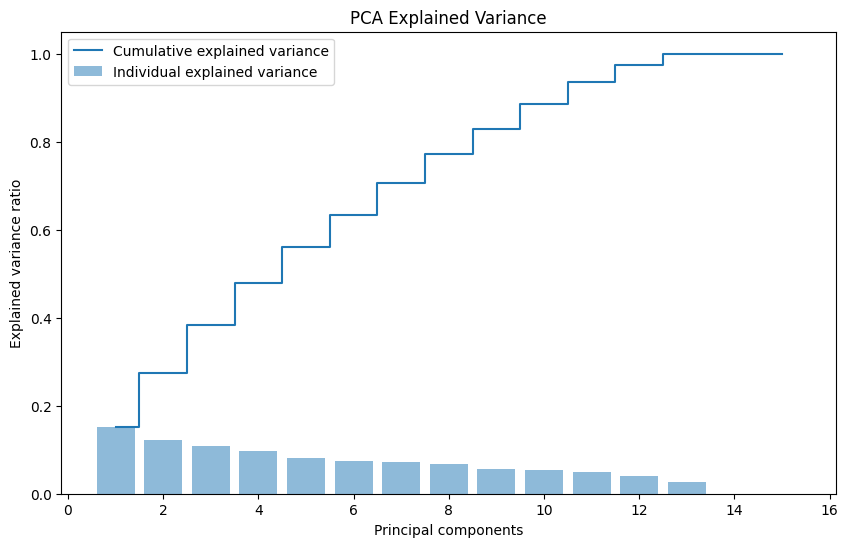

,PC,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,1.513927e-01,0.151393
1,PC2,1.231144e-01,0.274507
2,PC3,1.085650e-01,0.383072
3,PC4,9.626297e-02,0.479335
4,PC5,8.106762e-02,0.560403
5,PC6,7.388896e-02,0.634292
6,PC7,7.159812e-02,0.705890
7,PC8,6.700601e-02,0.772896
8,PC9,5.712282e-02,0.830019
9,PC10,5.498585e-02,0.885004


In [11]:
import matplotlib.pyplot as plt

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()

# Displaying the explained variance ratio and cumulative variance
pd.DataFrame({'PC': [f'PC{i+1}' for i in range(len(explained_variance_ratio))], 
              'Explained Variance Ratio': explained_variance_ratio,
              'Cumulative Explained Variance': cumulative_explained_variance})


In [12]:
import numpy as np

# Number of top features to display for each PC
num_top_features = 5

# Get the PCA components (loadings)
loadings = pca.components_

# Create a DataFrame of loadings with feature names
loadings_df = pd.DataFrame(loadings, columns=data_pca.columns)

# Identifying the most contributing features for each of the first few PCs
top_features = {}
for i in range(min(len(loadings), 5)):  # Inspecting only the first 5 PCs for brevity
    sorted_loading_indices = np.argsort(np.abs(loadings_df.iloc[i]))[::-1]
    top_features[f'PC{i+1}'] = loadings_df.columns[sorted_loading_indices[:num_top_features]].values

top_features_df = pd.DataFrame(top_features)
top_features_df

# Gives the observation above, I decline there exits Complex Interactions and Multidimensionality problem in our data, 
# which means the covariance is important between different features or components


,PC1,PC2,PC3,PC4,PC5
0,Other Metal,O,Aromatic,Aliphatic,S
1,Other_Metal_Present,"Ketones, aldehydes, carboxylic acids, or esters",Tertiary Amine or Amide Nitrogen,Secondary Amine or Aromatic Nitrogen,Secondary Amine or Aromatic Nitrogen
2,"Ketones, aldehydes, carboxylic acids, or esters",Hydroxyl or Ether,Partially Aromatic,Tertiary Amine or Amide Nitrogen,Partially Aromatic
3,O,Other Metal,P,Aromatic,Aliphatic
4,Aromatic,Other_Metal_Present,Primary Amine or Ammonium Ion,Primary Amine or Ammonium Ion,Hydroxyl or Ether


In [13]:
data_pca.head()


,O,Halogens,S,P,Other Metal,Hydroxyl or Ether,"Ketones, aldehydes, carboxylic acids, or esters",Primary Amine or Ammonium Ion,Secondary Amine or Aromatic Nitrogen,Tertiary Amine or Amide Nitrogen,Aliphatic,Partially Aromatic,Aromatic,Halogens_Present,Other_Metal_Present
0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0


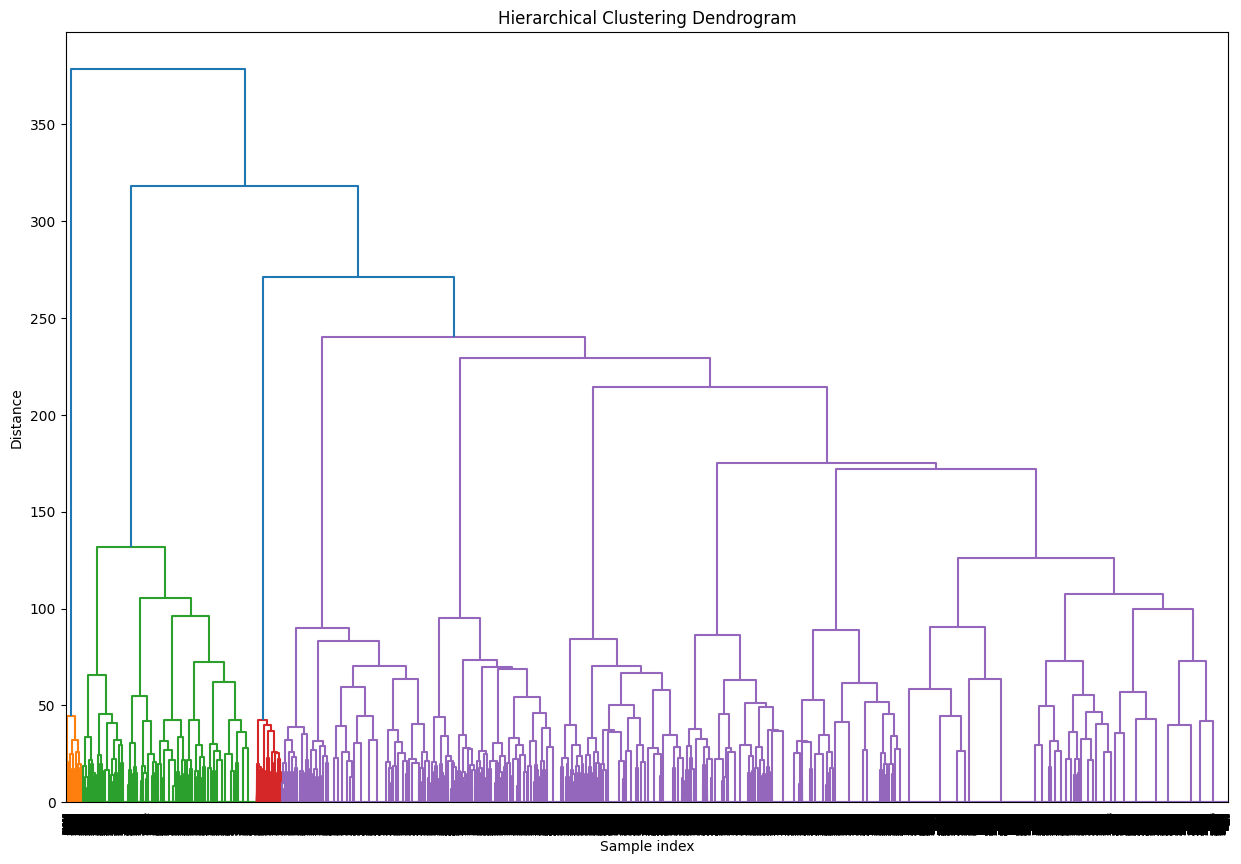

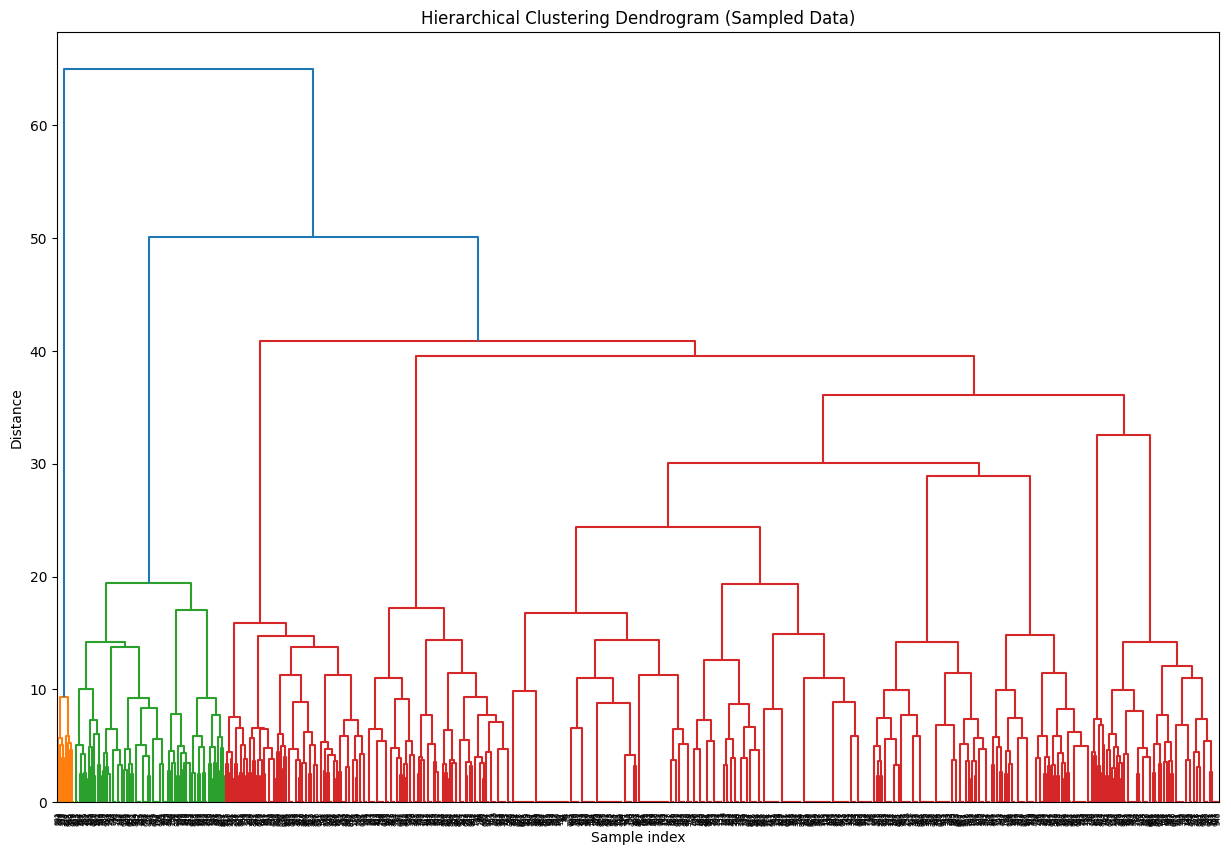

In [19]:
from sklearn.utils import resample
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Standardizing the dataset
scaler = StandardScaler()
data_scaled_for_clustering = scaler.fit_transform(data_pca)

# Using the Ward linkage method as a default
# This method is often used because it tends to create clusters of similar sizes
linkage_matrix = linkage(data_scaled_for_clustering, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Sampling a subset of the data for hierarchical clustering
# Let's sample a manageable size, e.g., 1000 data points
sample_size = 1000
data_sampled = resample(data_scaled_for_clustering, n_samples=sample_size, random_state=0)

# Applying hierarchical clustering to the sampled data
linkage_matrix_sampled = linkage(data_sampled, method='ward')

# Plotting the dendrogram for the sampled data
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix_sampled)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
